<a href="https://colab.research.google.com/github/MartinVIllesca/Ramos-Redes/blob/master/CC7221/tarea2/tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# cargar dataset
!unzip './drive/My Drive/dataCC7221/tarea2/orand-car-with-bbs.zip'

Streaming output truncated to the last 5000 lines.
  inflating: orand-car-with-bbs/training/images/0198_1148918_202446.png  
  inflating: orand-car-with-bbs/training/images/0489_5207294_228320.png  
  inflating: orand-car-with-bbs/training/images/0045_0372889_287060.png  
  inflating: orand-car-with-bbs/training/images/0332_6254282_116068.png  
  inflating: orand-car-with-bbs/training/images/0963_3801246_497131.png  
  inflating: orand-car-with-bbs/training/images/0910_2309994_216000.png  
  inflating: orand-car-with-bbs/training/images/0136_1965273_239100.png  
  inflating: orand-car-with-bbs/training/images/0711_0053757_114240.png  
  inflating: orand-car-with-bbs/training/images/0185_0508987_129472.png  
  inflating: orand-car-with-bbs/training/images/0543_0689066_262000.png  
  inflating: orand-car-with-bbs/training/images/0103_0189763_322800.png  
  inflating: orand-car-with-bbs/training/images/0300_0541996_170850.png  
  inflating: orand-car-with-bbs/training/images/0356_1386777_

In [3]:
# visualizacion de algunas imagenes
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.patches as patches
import csv
import urllib
import cv2


In [7]:
def viewImageWAnnotations(path_im, annotations, axs):
  img = cv2.imread(path_im)

  axs.imshow(img)
  for annot in annotations:
    rect = patches.Rectangle((annot[1],annot[2]),annot[3],annot[4],linewidth=1,edgecolor='r',facecolor='none')
    axs.add_patch(rect)
  axs.axis('off')
  return img

def getAnnotation(path_annot):
  annotation = []
  path_annot = path_annot.split('.')[0] + '.txt'

  try:
    with open(path_annot) as file:
      lines = [line.strip() for line in file]
      _lines = [tuple(line.rstrip().split(':')) for line in lines]
      annotation.append([[int(l[0].strip())] + [int(j.strip()) for j in l[1].split(',')] for l in _lines])
    return annotation[0]
  except Exception as e:
    print(e)
    return []

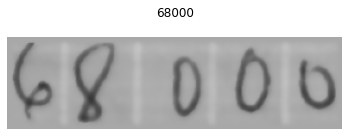

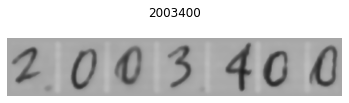

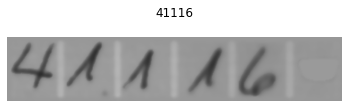

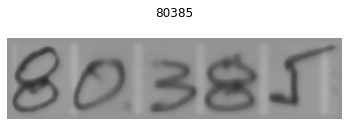

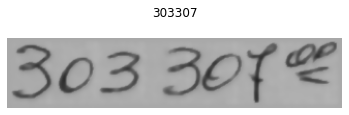

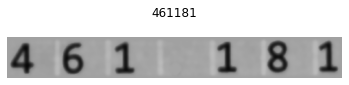

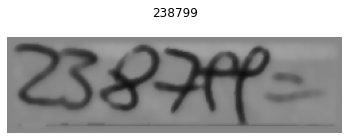

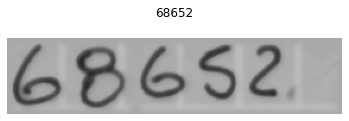

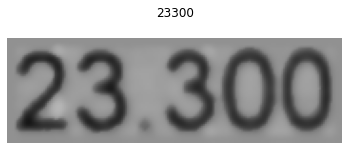

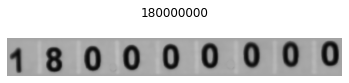

[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_7414781_16986.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/0359_0145675_94611.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/0172_9712473_32662.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_7565275_3046.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_3710351_2975.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_5563682_17437.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_7215738_2902.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_4946162_2828.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_344591_9255.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_7784333_409.t

In [21]:
dir_path = 'orand-car-with-bbs/'
training_path = os.path.join(dir_path, 'training/')
testing_path = os.path.join(dir_path, 'test/')
training_images = os.path.join(training_path, 'images/')
testing_images_path = os.path.join(testing_path, 'images/')
training_annotations = os.path.join(training_path, 'annotations/')

testing_cash_path = os.path.join(testing_path, 'list.txt')
testing_images = []
testing_cash = []
with open(testing_cash_path) as file:
  lines = [l.split('\t') for l in file]
  for l in lines[:10]:
    img = cv2.imread(os.path.join(testing_images_path, l[0]))
    plt.imshow(img)
    plt.title(l[1])
    plt.axis('off')
    plt.show()
  for l in lines:
    testing_images.append(os.path.join(testing_images_path, l[0]))
    testing_cash.append(l[1])

images_path = [f for f in os.listdir(training_images) if os.path.isfile(os.path.join(training_images, f))]
annotations = [getAnnotation(os.path.join(training_annotations, path_img)) for path_img in images_path]


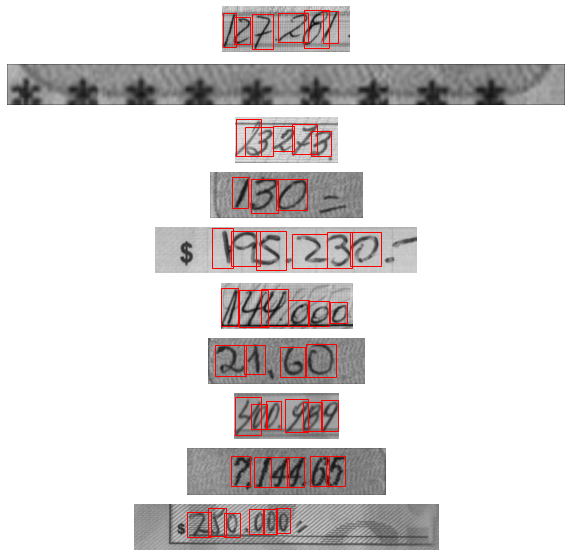

In [8]:
# visualizacion de algunas imagenes
fig, axs = plt.subplots(10, 1, figsize=(10,10))
for i, img_path in enumerate(images_path[:10]):
  img_path = os.path.join(training_images, img_path)
  annot = annotations[i]
  viewImageWAnnotations(img_path, annot, axs[i])

In [7]:
ANNOTATIONS_FILE = 'annotations.csv'
CLASSES_FILE = 'classes.csv'

In [8]:
annotations2write = []
classes2write = set([])

for i, img_path in enumerate(images_path):
  img_path = os.path.join(training_images, img_path)
  annot = annotations[i]
  if len(annot) > 0:
    for a in annot:
      x1 = a[1]
      y1 = a[2]
      x2 = x1 + a[3]
      y2 = y1 + a[4]
      if x1 >= 0 and y1 >= 0:
        annotations2write.append([img_path, x1, y1, x2, y2, a[0]])
        classes2write.add('{}'.format(a[0]))

print(len(annotations2write))
print(len(classes2write))

with open(ANNOTATIONS_FILE, 'w') as f:
  writer = csv.writer(f)
  writer.writerows(annotations2write)

with open(CLASSES_FILE, 'w') as f:
  for i, line in enumerate(classes2write):
    f.write('{},{}\n'.format(i,i))

31487
10


In [8]:
!git clone https://github.com/MartinVIllesca/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 5876 (delta 4), reused 12 (delta 4), pack-reused 5862
Receiving objects: 100% (5876/5876), 13.52 MiB | 4.16 MiB/s, done.
Resolving deltas: 100% (3952/3952), done.


In [9]:
%cd keras-retinanet/

!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=170566 sha256=7b10e48131232502c7ce4dd4bd32307fc4006f5f6987b9ae983b287de992d83d
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13346 sha256=88abfad1961e11d7ef903bd536bd7a73bc024ad04eded253120357f6231be821
  Stored in directory: /root/.cache/pip/wheels/80/dd/ac/842235b63dddac12faa4b48ebe58b8944e8c2e57c2e38dddb6
Successfully built keras-retinanet keras-resnet


In [10]:
!python setup.py build_ext --inplace

running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/keras_retinanet
creating build/temp.linux-x86_64-3.6/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.linux-x86_64-3.6/keras_retinanet/utils/compute_overlap.o
In file included from /usr/local/lib/python3.6/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1832:0,
                 from /usr/local/lib/python3.6/dist-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /usr/local/lib/python3.6/dist-packages/numpy/core/include/numpy/arrayobject.h:4,
 

In [11]:
!pwd
%cd ..

/content/keras-retinanet
/content


In [1]:
PRETRAINED_MODEL = './drive/My\ Drive/dataCC7221/tarea2/last/resnet18_csv_60.h5'
# PRETRAINED_MODEL = '/content/drive/My\ Drive/dataCC7221/tarea2/resnet18_csv_06_1.h5'

# URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet101_oid_v1.0.0.h5'
# URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
# urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to ./drive/My\ Drive/dataCC7221/tarea2/last/resnet18_csv_60.h5


In [2]:
!keras-retinanet/keras_retinanet/bin/train.py --backbone resnet18 --lr 0.00001 --initial-epoch 60 --snapshot-path ./drive/My\ Drive/dataCC7221/tarea2/last/ --weights {PRETRAINED_MODEL} --multiprocessing --batch-size 8 --steps 500 --epochs 80 csv annotations.csv classes.csv

Using TensorFlow backend.
2020-07-19 03:14:58.014733: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Creating model, this may take a second...
Loading resnet18
2020-07-19 03:15:01.349790: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-19 03:15:01.395465: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-19 03:15:01.396275: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-07-19 03:15:01.396330: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcud

In [9]:
import matplotlib as mp
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import cv2
from tqdm import tqdm
import os
import random
import numpy as np
import matplotlib.pyplot as plt


In [10]:
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image


In [11]:

model = models.load_model('./drive/My Drive/dataCC7221/tarea2/last/resnet18_csv_80.h5', backbone_name='resnet18')
model = models.convert_model(model)

Using TensorFlow backend.


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

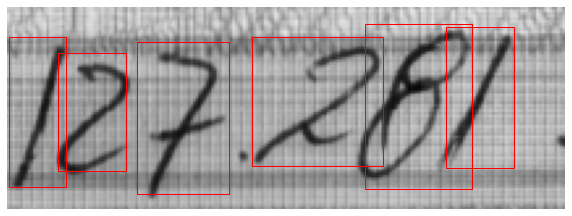

[[  0.64772666  10.772175    22.084473    68.873245  ]
 [ 18.44705     16.679811    48.0298      63.95206   ]
 [ 50.79799     12.554379    82.973526    72.01813   ]
 [ 92.35743     10.4618     143.45013     59.72458   ]
 [134.61032      4.1492696  176.47113     66.11453   ]
 [164.84142      8.054669   192.88174     59.61486   ]]
[0.81489366 0.8990668  0.84480333 0.74154216 0.7675169  0.6669849 ]
[1 2 7 2 8 1]


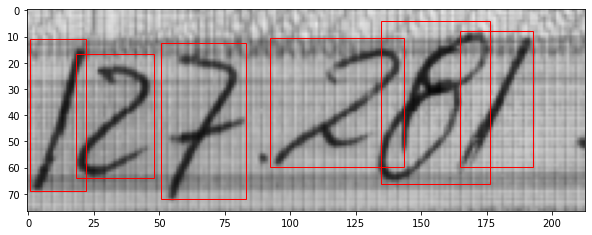

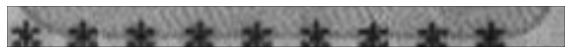

[]
[]
[]


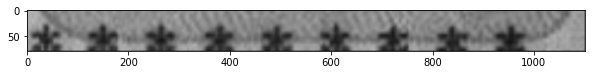

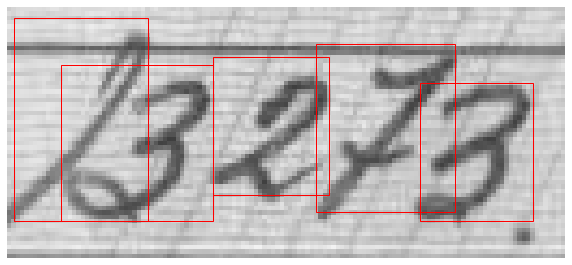

[[ 11.481895  12.080298  46.081844  48.723278]
 [ 46.84428   12.222672  73.84126   44.34909 ]
 [ 71.3954     7.502357 102.34508   48.067066]]
[0.7583009  0.7178915  0.78626305]
[3 2 7]


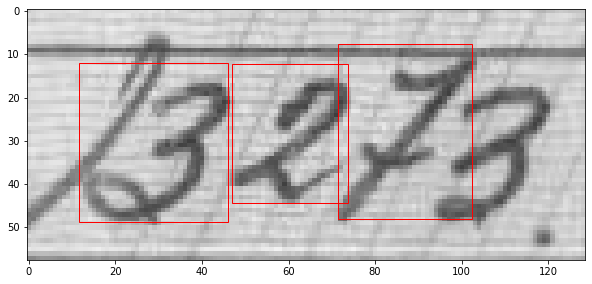

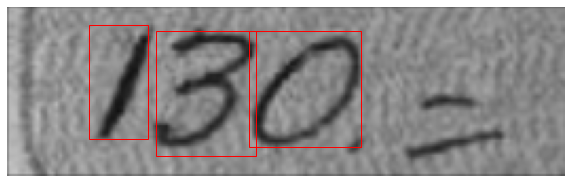

[[ 38.582382  10.016393  68.41552   62.71317 ]
 [ 69.29924   10.09042  116.474884  66.932655]
 [115.29789   11.761722 168.39896   66.69033 ]]
[0.9197025 0.8988459 0.9664528]
[1 3 0]


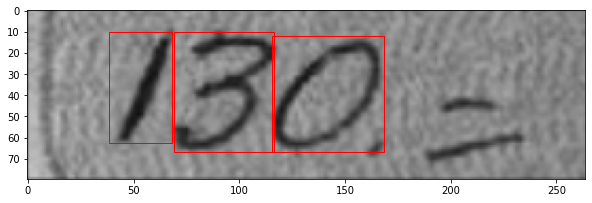

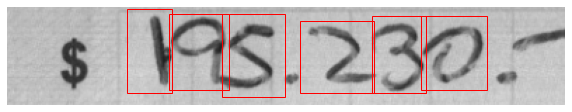

[[ 92.99569     3.7763884 117.866806   56.913376 ]
 [114.577644    4.667849  157.74696    56.644035 ]
 [212.02086     8.796867  261.87186    57.763626 ]
 [259.14716     7.4453306 298.06082    61.29928  ]
 [296.75272     8.897729  342.3102     58.506626 ]]
[0.8043803  0.8284722  0.77161914 0.8612177  0.9440254 ]
[1 9 2 3 0]


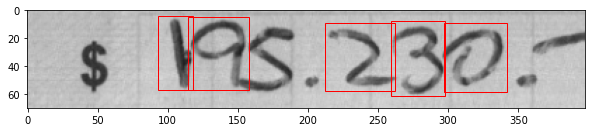

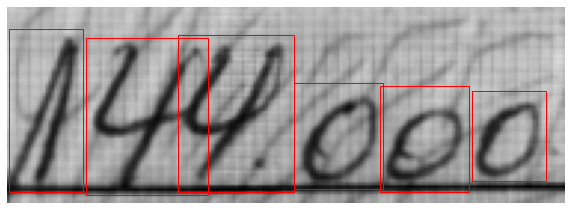

[[  0.3100948   6.712884   25.106388   61.748955 ]
 [ 27.187744    6.586922   64.053734   62.796085 ]
 [ 57.550766    8.573658   94.8292     60.828644 ]
 [ 97.345535   25.085403  125.5163     60.136417 ]
 [125.22087    25.255308  154.99751    61.122856 ]
 [155.75726    27.732536  180.50755    57.689472 ]]
[0.92928135 0.882768   0.879749   0.90816927 0.9161776  0.9527655 ]
[1 4 4 0 0 0]


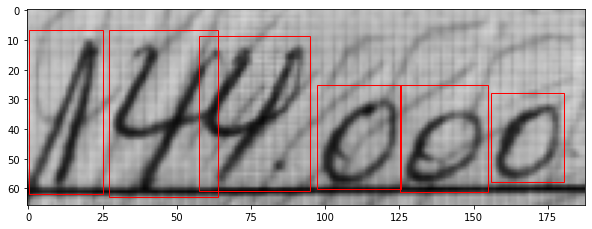

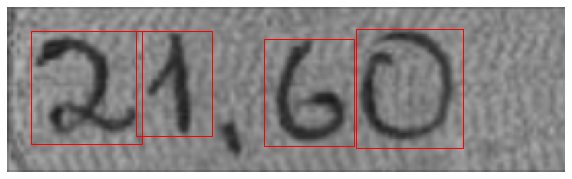

[[ 10.704976  13.072067  64.13826   63.34358 ]
 [ 65.18021   10.486438  97.35305   63.213215]
 [127.10819   14.074844 165.21707   66.345   ]
 [170.15387    9.455392 219.9856    66.23881 ]]
[0.8799019 0.9211569 0.9683848 0.9096479]
[2 1 6 0]


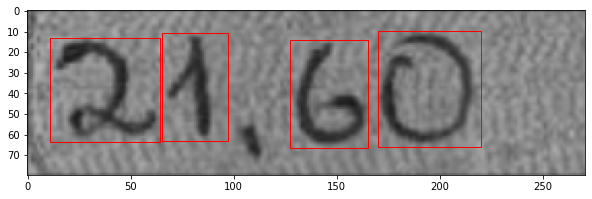

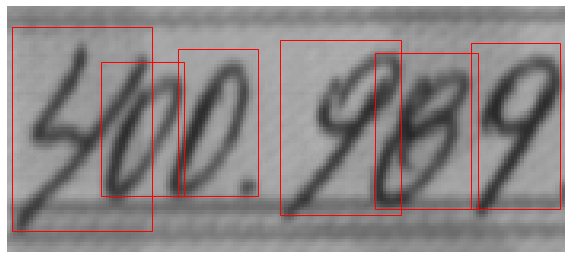

[[  1.4113237   8.510424   44.04157    69.26028  ]
 [ 30.378109   15.569899   55.432407   61.205063 ]
 [ 51.20532    13.156073   77.49879    59.6305   ]
 [113.30623    15.091452  145.08105    62.725586 ]
 [145.04718    10.4475765 172.15038    64.50706  ]]
[0.7075439  0.87183774 0.94259393 0.72069865 0.8710765 ]
[4 0 0 8 9]


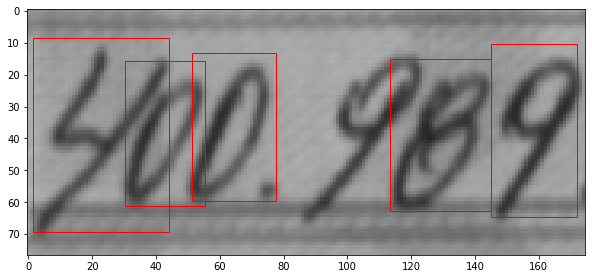

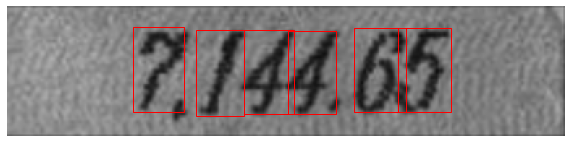

[[ 76.0036    12.75779  110.87907   65.10108 ]
 [116.96458   13.611327 146.83716   67.00547 ]
 [145.51567   13.090857 176.04837   66.61132 ]
 [172.8377    13.979608 204.81807   65.86454 ]
 [213.37065   13.504634 245.28273   65.829216]
 [241.36938   11.806209 274.89246   66.16698 ]]
[0.83053803 0.85479933 0.7582295  0.7679605  0.82046705 0.8684574 ]
[7 1 4 4 6 5]


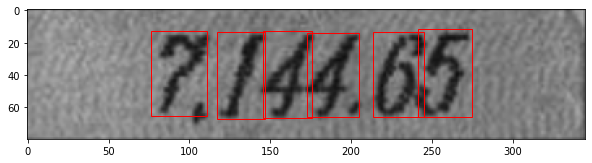

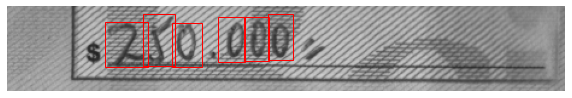

[[ 81.20093    9.968747 114.18046   51.74036 ]
 [112.099915   6.178815 138.95152   50.983406]
 [136.60522    8.188547 161.29225   48.175026]
 [178.00226    8.960093 198.33675   45.98685 ]
 [197.4753     8.237469 216.88028   44.51132 ]
 [216.32793    8.436918 237.50227   44.141235]]
[0.8839532  0.6739057  0.95671195 0.915814   0.91819745 0.94008744]
[2 5 0 0 0 0]


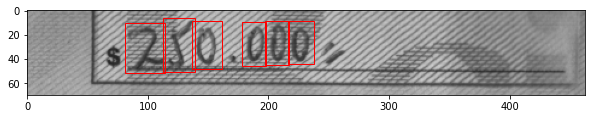

In [12]:
umbral = 0.6

for i, img_path in enumerate(images_path[:10]):
  img_path = os.path.join(training_images, img_path)
  annot = annotations[i]
  fig, axs = plt.subplots(1, 1, figsize=(10,10))
  image = viewImageWAnnotations(img_path, annot, axs)
  plt.show()

  try:
    if image.shape[2] != 3: break
  except Exception as e:
    print(e)
    continue

  image = read_image_bgr(img_path)
  image2 = cv2.imread(img_path)
  fig, axs = plt.subplots(1,1, figsize=(10,10))
  image = preprocess_image(image)
  axs.imshow(image2)
  image, scale = resize_image(image)

  boxes, scores, labels = model.predict(np.expand_dims(image, axis=0))
  boxes /= scale
  boxes = boxes[0]
  scores = scores[0]
  labels = labels[0]

  orden = np.where(scores > umbral)[0]
  orden = [x for _,x in sorted(zip([x[0] for x in boxes[orden]], orden))]

  for box in boxes[orden]:
    rect = patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],linewidth=1,edgecolor='r',facecolor='none')
    axs.add_patch(rect)

  print(boxes[orden])
  print(scores[orden])
  print(labels[orden])
  plt.show()
  # print(np.where(scores > umbral)[0])

In [41]:
def bb_intersection_over_union(boxA, boxB):
	# determine the (x, y)-coordinates of the intersection rectangle
	xA = max(boxA[0], boxB[0])
	yA = max(boxA[1], boxB[1])
	xB = min(boxA[2], boxB[2])
	yB = min(boxA[3], boxB[3])
	# compute the area of intersection rectangle
	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
	# compute the area of both the prediction and ground-truth
	# rectangles
	boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
	boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
	iou = interArea / float(boxAArea + boxBArea - interArea)
	# return the intersection over union value
	return iou

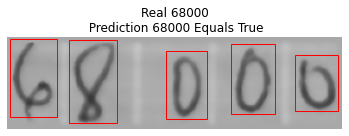

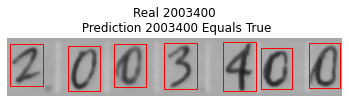

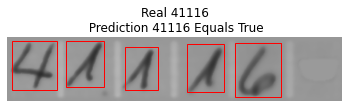

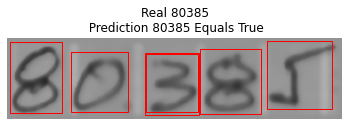

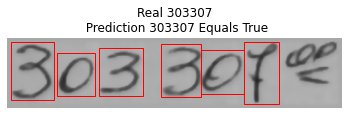

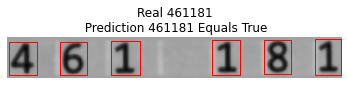

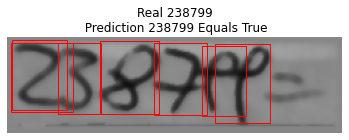

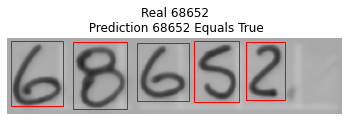

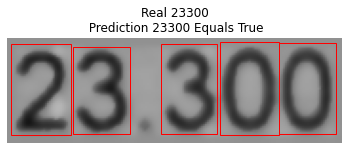

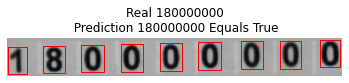

In [51]:
for i, img in enumerate(testing_images[:10]):
  img2 = cv2.imread(img)
  img = read_image_bgr(img)
  
  fig, axs = plt.subplots()
  axs.imshow(img2)
  axs.axis('off')

  image = preprocess_image(img)
  image, scale = resize_image(image)

  boxes, scores, labels = model.predict(np.expand_dims(image, axis=0))
  boxes /= scale
  boxes = boxes[0]
  scores = scores[0]
  labels = labels[0]

  orden = np.where(scores > umbral)[0]
  orden = [x for _,x in sorted(zip([x[0] for x in boxes[orden]], orden))]

  box_anterior = boxes[orden][-1]
  prediction = ''
  scores_anterior = 0
  
  for j, box in enumerate(boxes[orden]):
    iou = bb_intersection_over_union(box_anterior, box)
    box_anterior = box
    if iou < 0.6:
      prediction += str(labels[orden][j])
    elif scores[orden][j] > scores_anterior:
      prediction = prediction[:-1] + str(labels[orden][j])

    scores_anterior = scores[orden][j]
    
    rect = patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],linewidth=1,edgecolor='r',facecolor='none')
    axs.add_patch(rect)

  axs.set_title('Real {} Prediction {} Equals {}'.format(testing_cash[i],
                                                         prediction,
                                                         int(testing_cash[i]) == int(prediction)))

  # print(boxes[orden])
  # print(scores[orden])
  # print(labels[orden])
  plt.show()


In [69]:
def calcAccuracy(model):
  # accuracy
  aciertos = []
  totales = len(testing_cash)
  # malos = []

  for i, img in enumerate(testing_images):
    if i % 100 == 0: print('\r{:.2f}\t'.format(i/totales), end='', flush=True)
    img = read_image_bgr(img)
    image = preprocess_image(img)
    image, scale = resize_image(image)

    boxes, scores, labels = model.predict(np.expand_dims(image, axis=0))
    boxes /= scale
    boxes = boxes[0]
    scores = scores[0]
    labels = labels[0]

    orden = np.where(scores > umbral)[0]
    orden = [x for _,x in sorted(zip([x[0] for x in boxes[orden]], orden))]

    if len(orden) == 1:
      prediction = str(labels[orden][0])

      if int(prediction) == int(testing_cash[i]): aciertos.append(testing_images[i])
      # else: malos.append(testing_images[i])
    
    elif len(orden) > 1:
      box_anterior = boxes[orden][-1]
      prediction = ''
      scores_anterior = 0
      
      for j, box in enumerate(boxes[orden]):
        iou = bb_intersection_over_union(box_anterior, box)
        box_anterior = box
        if iou < 0.6:
          prediction += str(labels[orden][j])
        elif scores[orden][j] > scores_anterior:
          prediction = prediction[:-1] + str(labels[orden][j])

        scores_anterior = scores[orden][j]
    
      if int(prediction) == int(testing_cash[i]): aciertos.append(testing_images[i])
      # else: malos.append(testing_images[i])
    
    # else:
    #   malos.append(testing_images[i])
  return len(aciertos)/totales

In [70]:
acc = calcAccuracy(model)
print()
print('Accuracy {:.4f}'.format(acc))

0.86	Accuracy 0.5875


In [73]:
accuracies = []
for idModelo in range(1,80,10):
  model = models.load_model('./drive/My Drive/dataCC7221/tarea2/last/resnet18_csv_{:02d}.h5'.format(idModelo), backbone_name='resnet18')
  print('loaded resnet18_csv_{:02d} model'.format(idModelo))
  model = models.convert_model(model)
  acc = calcAccuracy(model)
  accuracies.append(acc)
  print('Accuracy {:.4f}'.format(acc))

tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

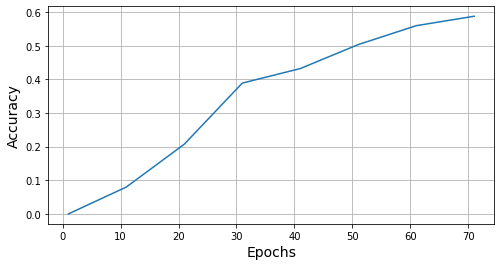

In [80]:
plt.figure(figsize=(8,4))
plt.plot(range(1,80, 10), accuracies)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid()
plt.show()